# Anomaly Detection in Univariate Time Series with Random Forest, in the context of WISDom project: Time Series Analysis and Prediction Methods

### Flow Rate Data from a sensor in a Water Sypply System located in Barreiro

## Outline

1. Introduction
      - Basic definitions
      - Quality metrics
2. Move, smoothe, evaluate
      - Rolling window estimations
      - Time-series cross validation, parameters selection
3. Econometric approach
      - Stationarity, unit root
4. Non-Linear (and not quite) models on time series -> Random Forest
      - Feature extraction
      - Non-Linear models, feature importance
      - Regularization, feature selection
      - XGBoost (Linear)

# 1. Introduction

## Acquiring data

Feature Names
Index(['date', 'time', 'value', 'detection'], dtype='object')
Feature Names
Index(['date', 'time', 'value', 'detection'], dtype='object')
Feature Names
Index(['date'], dtype='object')
Data Dimension:
Number of Records: 480
Number of Features: 4
Data Dimension:
Number of Records: 96
Number of Features: 4
Data Dimension:
Number of Records: 767
Number of Features: 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       96 non-null    

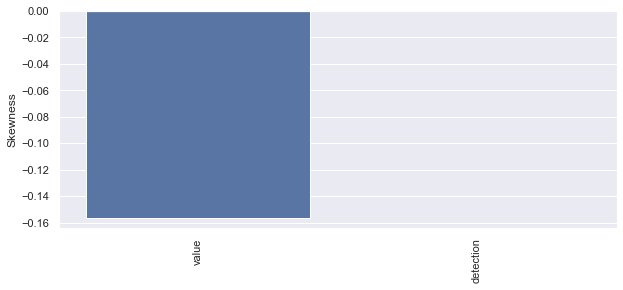

Skewness of the below features:
value       -0.104418
detection    2.038954
dtype: float64


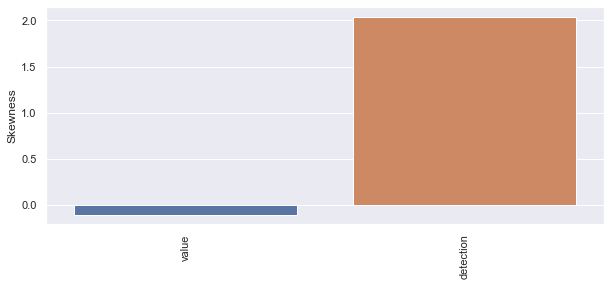

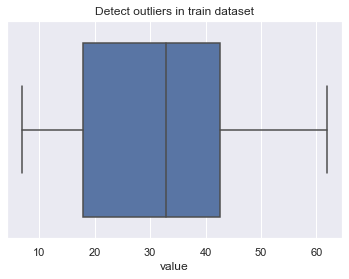

Interquartile range: 24.6293


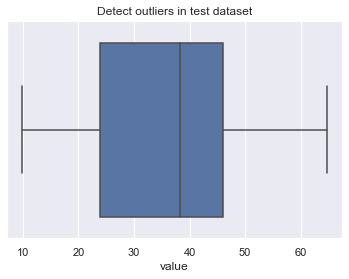

Interquartile range: 22.1598495375


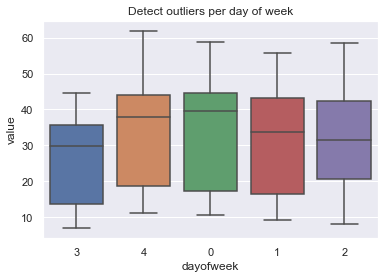

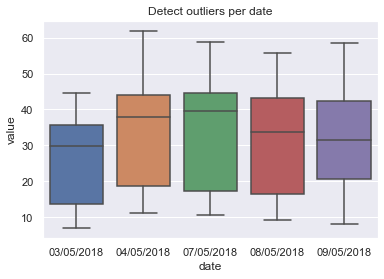

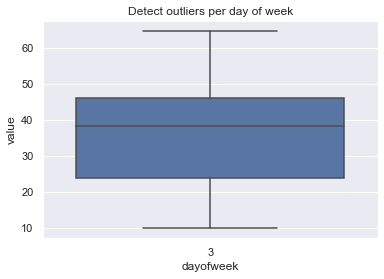

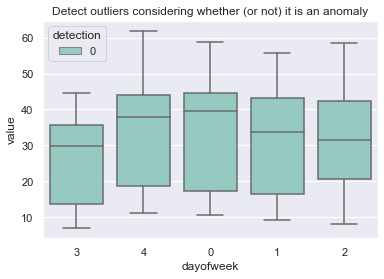

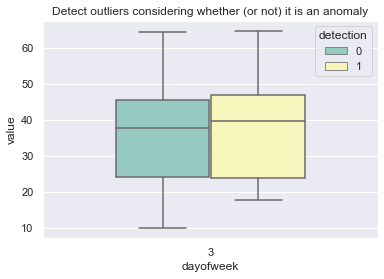

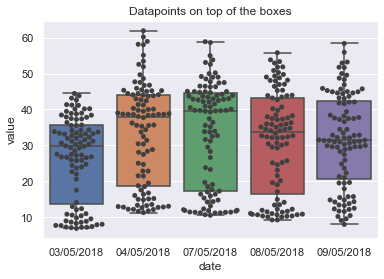

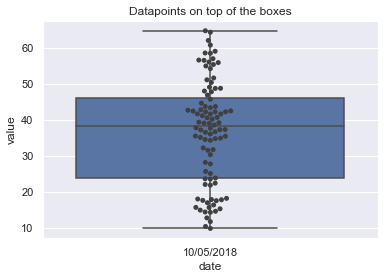

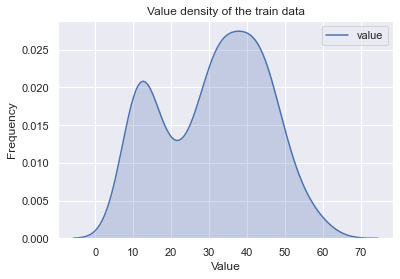

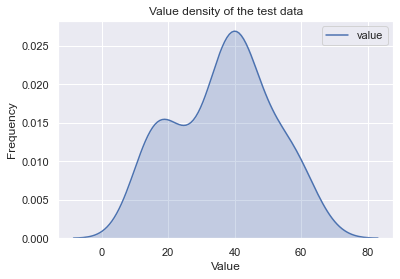

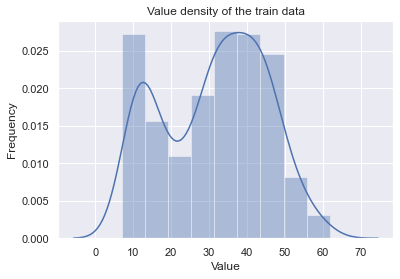

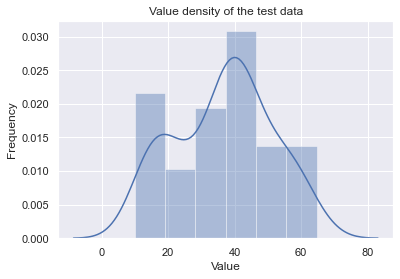

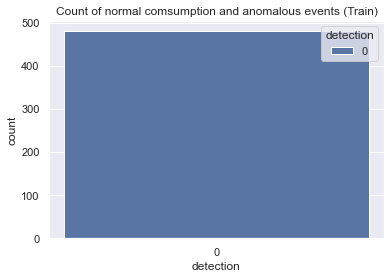

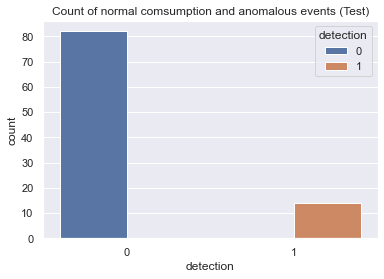

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    object 
 4   int_date   480 non-null    int32  
 5   timestamp  480 non-null    int64  
 6   dayofweek  480 non-null    int64  
 7   month      480 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 28.2+ KB


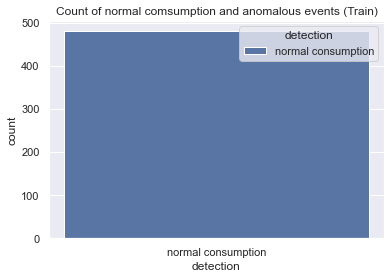

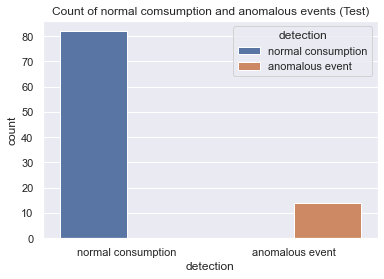

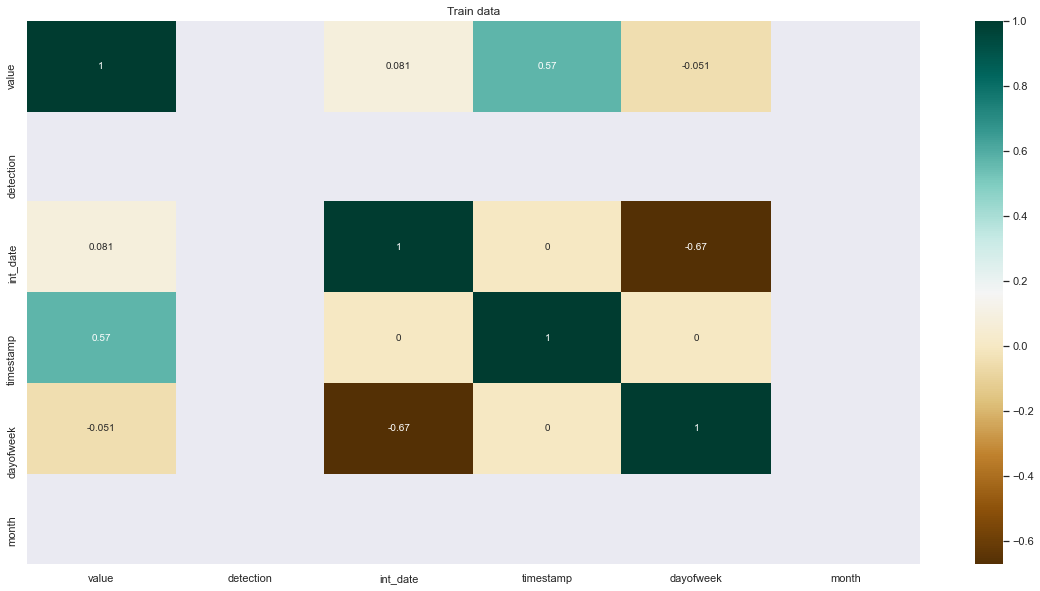

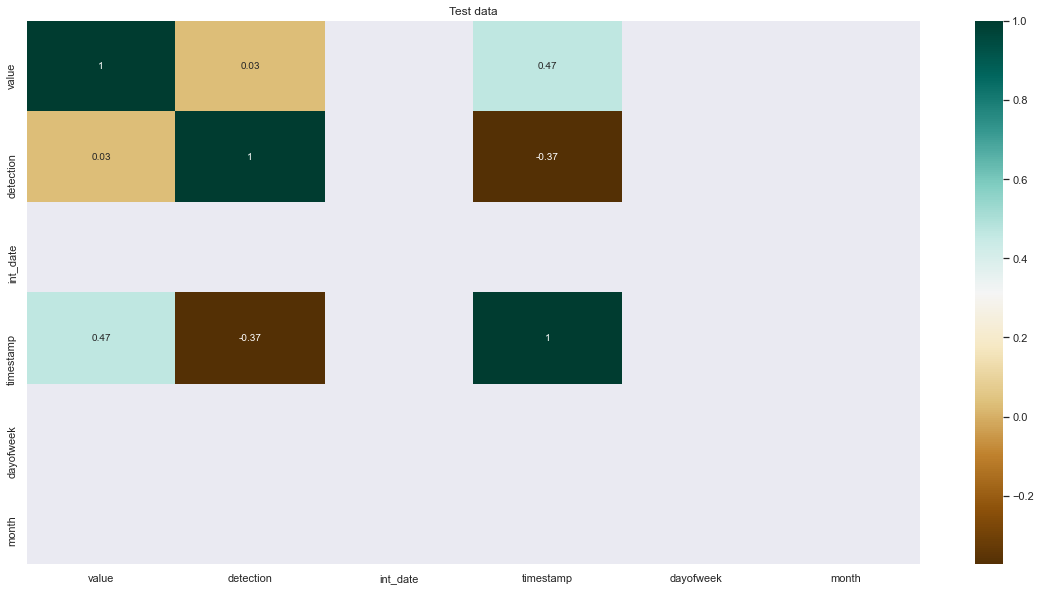

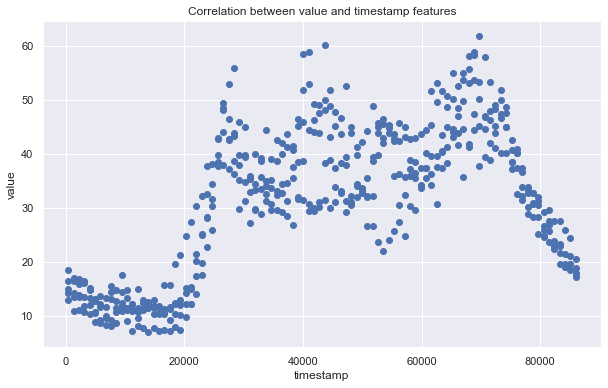

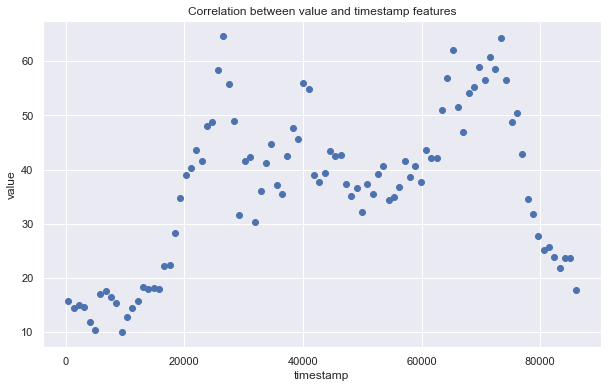

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    int64  
 4   int_date   480 non-null    int32  
 5   timestamp  480 non-null    int64  
 6   dayofweek  480 non-null    int64  
 7   month      480 non-null    int64  
 8   datetime   480 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 32.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       480 non-null    object        
 1   time       480 non-null    object        
 2   value      480 non-null    float64       
 3   detection  480 non-null    int64       

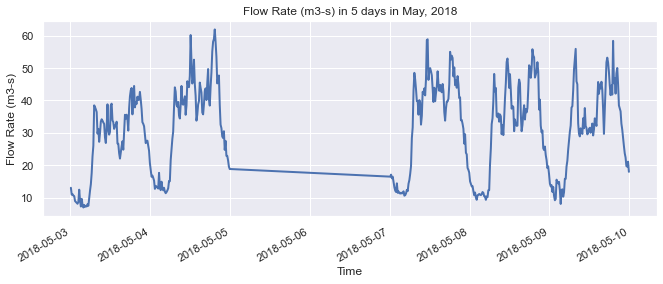

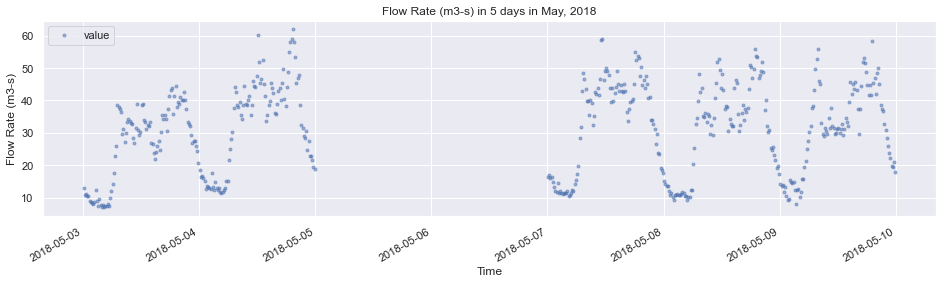

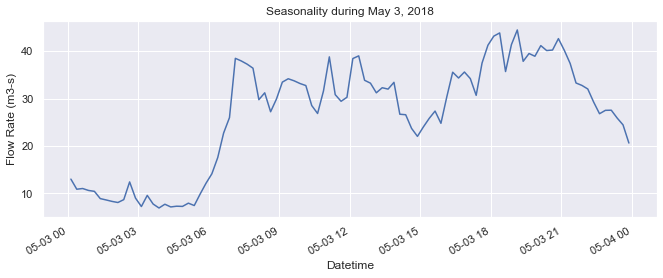

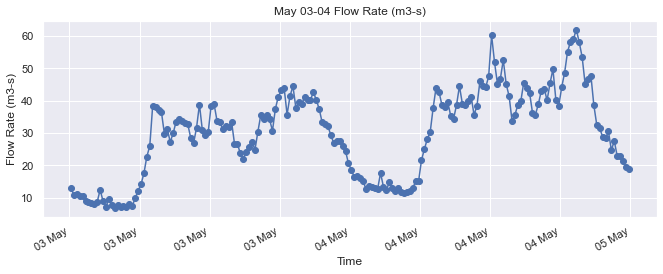

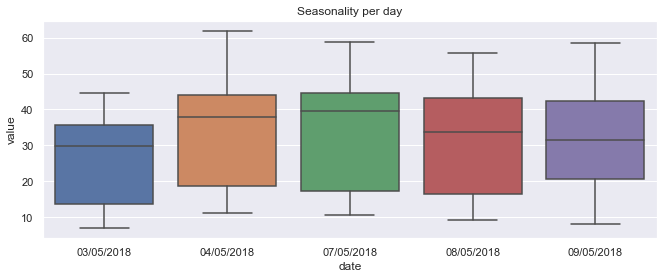

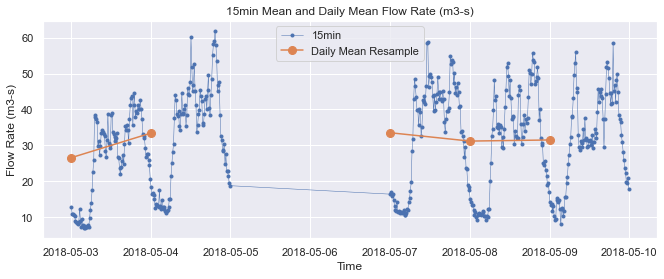

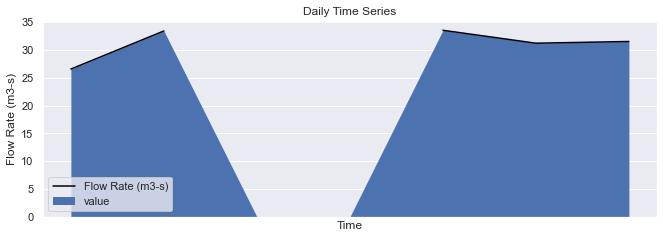

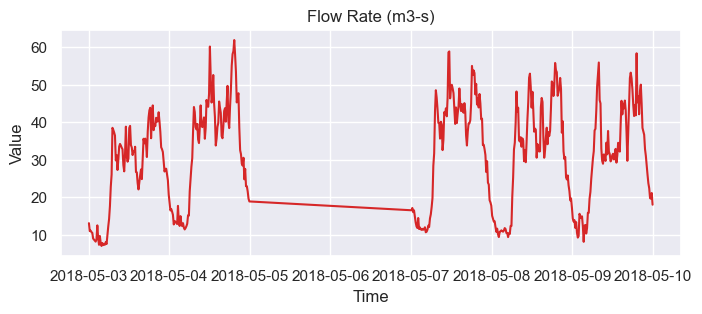

datetime
2018-05-03 00:07:30    13.026578
2018-05-03 00:22:30    10.898906
2018-05-03 00:37:30    11.048772
2018-05-03 00:52:30    10.641706
2018-05-03 01:07:30    10.452578
                         ...    
2018-05-09 22:52:30    22.357783
2018-05-09 23:07:30    19.707922
2018-05-09 23:22:30    19.546844
2018-05-09 23:37:30    21.068406
2018-05-09 23:52:30    17.953072
Name: trend, Length: 480, dtype: float64
datetime
2018-05-03 00:07:30    0.0
2018-05-03 00:22:30    0.0
2018-05-03 00:37:30    0.0
2018-05-03 00:52:30    0.0
2018-05-03 01:07:30    0.0
                      ... 
2018-05-09 22:52:30    0.0
2018-05-09 23:07:30    0.0
2018-05-09 23:22:30    0.0
2018-05-09 23:37:30    0.0
2018-05-09 23:52:30    0.0
Name: seasonal, Length: 480, dtype: float64
datetime
2018-05-03 00:07:30    0.0
2018-05-03 00:22:30    0.0
2018-05-03 00:37:30    0.0
2018-05-03 00:52:30    0.0
2018-05-03 01:07:30    0.0
                      ... 
2018-05-09 22:52:30    0.0
2018-05-09 23:07:30    0.0
2018-05-09 2

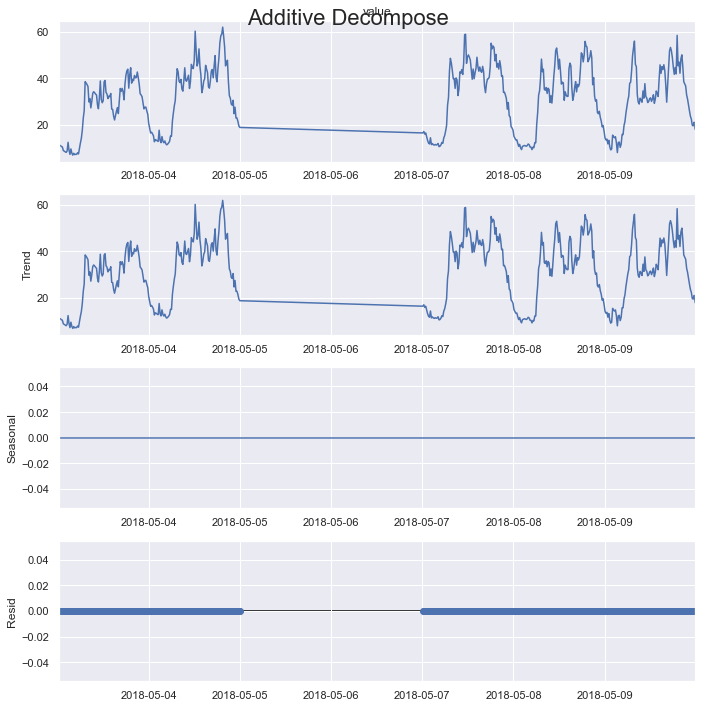

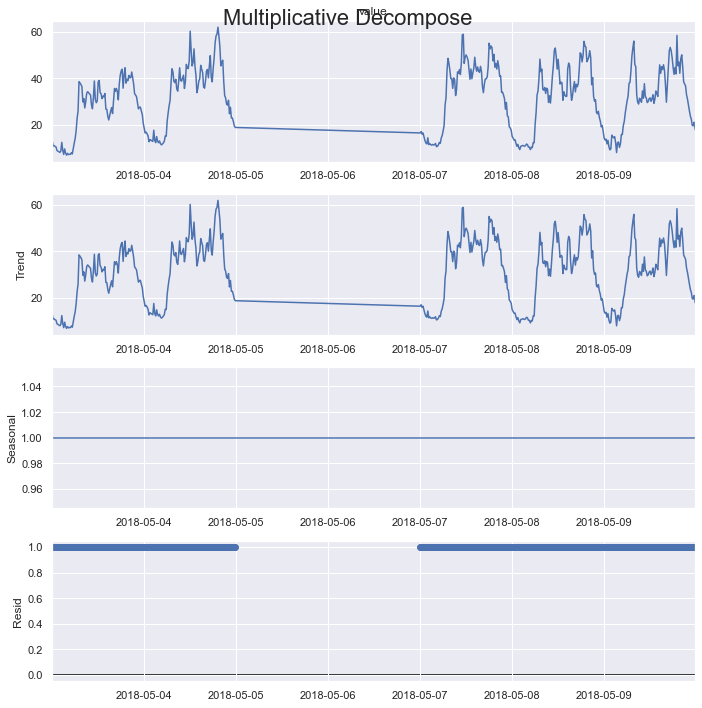

In [1]:
# To run a python script
%run TimeSeries_FinalAnalysis.ipynb

## Libraries and Packages

In [147]:
# Metrics
import sklearn.metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize  

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Lags of time series

# Random Forest algorithm
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

# Regularization and feature selection
from sklearn.linear_model import LassoCV, RidgeCV

# Boosting

# XGBoost algorithm
from xgboost import XGBRegressor 

## Data

### Train data

In [3]:
train

date      time      value  detection  int_date  timestamp  \
0    03/05/2018  00:07:30  13.026578          0  20180503        450   
1    03/05/2018  00:22:30  10.898906          0  20180503       1350   
2    03/05/2018  00:37:30  11.048772          0  20180503       2250   
3    03/05/2018  00:52:30  10.641706          0  20180503       3150   
4    03/05/2018  01:07:30  10.452578          0  20180503       4050   
..          ...       ...        ...        ...       ...        ...   
475  09/05/2018  22:52:30  22.357783          0  20180509      82350   
476  09/05/2018  23:07:30  19.707922          0  20180509      83250   
477  09/05/2018  23:22:30  19.546844          0  20180509      84150   
478  09/05/2018  23:37:30  21.068406          0  20180509      85050   
479  09/05/2018  23:52:30  17.953072          0  20180509      85950   

     dayofweek  month            datetime  
0            3      5 2018-05-03 00:07:30  
1            3      5 2018-05-03 00:22:30  
2            3      5 2018-05-03 00:37:30  
3            3      5 2018-05-03 00:52:30  
4            3      5 2018-05-03 01:07:30  
..         ...    ...                 ...  
475          2      5 2018-05-09 22:52:30  
476          2      5 2018-05-09 23:07:30  
477          2      5 2018-05-09 23:22:30  
478          2      5 2018-05-09 23:37:30  
479          2      5 2018-05-09 23:52:30  

[480 rows x 9 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       480 non-null    object        
 1   time       480 non-null    object        
 2   value      480 non-null    float64       
 3   detection  480 non-null    int64         
 4   int_date   480 non-null    int32         
 5   timestamp  480 non-null    int64         
 6   dayofweek  480 non-null    int64         
 7   month      480 non-null    int64         
 8   datetime   480 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(2)
memory usage: 32.0+ KB


In [5]:
df

value
datetime                      
2018-05-03 00:07:30  13.026578
2018-05-03 00:22:30  10.898906
2018-05-03 00:37:30  11.048772
2018-05-03 00:52:30  10.641706
2018-05-03 01:07:30  10.452578
...                        ...
2018-05-09 22:52:30  22.357783
2018-05-09 23:07:30  19.707922
2018-05-09 23:22:30  19.546844
2018-05-09 23:37:30  21.068406
2018-05-09 23:52:30  17.953072

[480 rows x 1 columns]

Text(0, 0.5, 'Flow Rate (m3-s)')

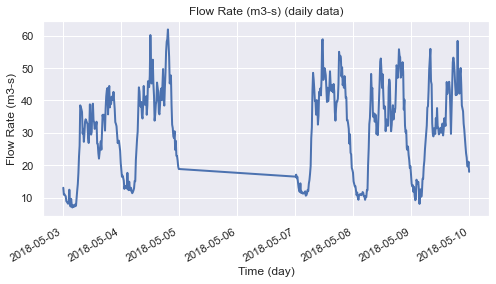

In [21]:
# Change line width of lines in matplotlib
df['value'].plot(linewidth=2,figsize=[8,4]).set_title('Flow Rate (m3-s) (daily data)')
plt.xlabel('Time (day)')
plt.ylabel('Flow Rate (m3-s)')

### Test data

In [22]:
test

date      time      value  detection  int_date  timestamp  \
0   10/05/2018  00:07:30  15.713694          0  20180510        450   
1   10/05/2018  00:22:30  14.460300          0  20180510       1350   
2   10/05/2018  00:37:30  14.975789          0  20180510       2250   
3   10/05/2018  00:52:30  14.658967          0  20180510       3150   
4   10/05/2018  01:07:30  11.786478          0  20180510       4050   
5   10/05/2018  01:22:30  10.446106          0  20180510       4950   
6   10/05/2018  01:37:30  17.025783          0  20180510       5850   
7   10/05/2018  01:52:30  17.597394          0  20180510       6750   
8   10/05/2018  02:07:30  16.407461          0  20180510       7650   
9   10/05/2018  02:22:30  15.341344          0  20180510       8550   
10  10/05/2018  02:37:30   9.905856          0  20180510       9450   
11  10/05/2018  02:52:30  12.816044          0  20180510      10350   
12  10/05/2018  03:07:30  14.369039          0  20180510      11250   
13  10/05/2018  03:22:30  15.730850          0  20180510      12150   
14  10/05/2018  03:37:30  18.236461          0  20180510      13050   
15  10/05/2018  03:52:30  17.844217          0  20180510      13950   
16  10/05/2018  04:07:30  18.061694          1  20180510      14850   
17  10/05/2018  04:22:30  17.910167          1  20180510      15750   
18  10/05/2018  04:37:30  22.092593          1  20180510      16650   
19  10/05/2018  04:52:30  22.449994          1  20180510      17550   
20  10/05/2018  05:07:30  28.190661          1  20180510      18450   
21  10/05/2018  05:22:30  34.791993          1  20180510      19350   
22  10/05/2018  05:37:30  39.085206          1  20180510      20250   
23  10/05/2018  05:52:30  40.195833          1  20180510      21150   
24  10/05/2018  06:07:30  43.702622          1  20180510      22050   
25  10/05/2018  06:22:30  41.648044          1  20180510      22950   
26  10/05/2018  06:37:30  47.983467          1  20180510      23850   
27  10/05/2018  06:52:30  48.706167          1  20180510      24750   
28  10/05/2018  07:07:30  58.443106          1  20180510      25650   
29  10/05/2018  07:22:30  64.691383          1  20180510      26550   
30  10/05/2018  07:37:30  55.865289          0  20180510      27450   
31  10/05/2018  07:52:30  49.059900          0  20180510      28350   
32  10/05/2018  08:07:30  31.564933          0  20180510      29250   
33  10/05/2018  08:22:30  41.662439          0  20180510      30150   
34  10/05/2018  08:37:30  42.227522          0  20180510      31050   
35  10/05/2018  08:52:30  30.340944          0  20180510      31950   
36  10/05/2018  09:07:30  36.071189          0  20180510      32850   
37  10/05/2018  09:22:30  41.148517          0  20180510      33750   
38  10/05/2018  09:37:30  44.631028          0  20180510      34650   
39  10/05/2018  09:52:30  37.207517          0  20180510      35550   
40  10/05/2018  10:07:30  35.514516          0  20180510      36450   
41  10/05/2018  10:22:30  42.433239          0  20180510      37350   
42  10/05/2018  10:37:30  47.767722          0  20180510      38250   
43  10/05/2018  10:52:30  45.696339          0  20180510      39150   
44  10/05/2018  11:07:30  56.034617          0  20180510      40050   
45  10/05/2018  11:22:30  54.922211          0  20180510      40950   
46  10/05/2018  11:37:30  39.026278          0  20180510      41850   
47  10/05/2018  11:52:30  37.790472          0  20180510      42750   
48  10/05/2018  12:07:30  39.357544          0  20180510      43650   
49  10/05/2018  12:22:30  43.365711          0  20180510      44550   
50  10/05/2018  12:37:30  42.463117          0  20180510      45450   
51  10/05/2018  12:52:30  42.651861          0  20180510      46350   
52  10/05/2018  13:07:30  37.313294          0  20180510      47250   
53  10/05/2018  13:22:30  35.135411          0  20180510      48150   
54  10/05/2018  13:37:30  36.550028          0  20180510      49050   
55  10/05/2018  13:52:30  32.22472

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       96 non-null     object        
 1   time       96 non-null     object        
 2   value      96 non-null     float64       
 3   detection  96 non-null     int64         
 4   int_date   96 non-null     int32         
 5   timestamp  96 non-null     int64         
 6   dayofweek  96 non-null     int64         
 7   month      96 non-null     int64         
 8   datetime   96 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(2)
memory usage: 6.5+ KB


In [24]:
dfT

value
datetime                      
2018-05-10 00:07:30  15.713694
2018-05-10 00:22:30  14.460300
2018-05-10 00:37:30  14.975789
2018-05-10 00:52:30  14.658967
2018-05-10 01:07:30  11.786478
2018-05-10 01:22:30  10.446106
2018-05-10 01:37:30  17.025783
2018-05-10 01:52:30  17.597394
2018-05-10 02:07:30  16.407461
2018-05-10 02:22:30  15.341344
2018-05-10 02:37:30   9.905856
2018-05-10 02:52:30  12.816044
2018-05-10 03:07:30  14.369039
2018-05-10 03:22:30  15.730850
2018-05-10 03:37:30  18.236461
2018-05-10 03:52:30  17.844217
2018-05-10 04:07:30  18.061694
2018-05-10 04:22:30  17.910167
2018-05-10 04:37:30  22.092593
2018-05-10 04:52:30  22.449994
2018-05-10 05:07:30  28.190661
2018-05-10 05:22:30  34.791993
2018-05-10 05:37:30  39.085206
2018-05-10 05:52:30  40.195833
2018-05-10 06:07:30  43.702622
2018-05-10 06:22:30  41.648044
2018-05-10 06:37:30  47.983467
2018-05-10 06:52:30  48.706167
2018-05-10 07:07:30  58.443106
2018-05-10 07:22:30  64.691383
2018-05-10 07:37:30  55.865289
2018-05-10 07:52:30  49.059900
2018-05-10 08:07:30  31.564933
2018-05-10 08:22:30  41.662439
2018-05-10 08:37:30  42.227522
2018-05-10 08:52:30  30.340944
2018-05-10 09:07:30  36.071189
2018-05-10 09:22:30  41.148517
2018-05-10 09:37:30  44.631028
2018-05-10 09:52:30  37.207517
2018-05-10 10:07:30  35.514516
2018-05-10 10:22:30  42.433239
2018-05-10 10:37:30  47.767722
2018-05-10 10:52:30  45.696339
2018-05-10 11:07:30  56.034617
2018-05-10 11:22:30  54.922211
2018-05-10 11:37:30  39.026278
2018-05-10 11:52:30  37.790472
2018-05-10 12:07:30  39.357544
2018-05-10 12:22:30  43.365711
2018-05-10 12:37:30  42.463117
2018-05-10 12:52:30  42.651861
2018-05-10 13:07:30  37.313294
2018-05-10 13:22:30  35.135411
2018-05-10 13:37:30  36.550028
2018-05-10 13:52:30  32.224728
2018-05-10 14:07:30  37.270067
2018-05-10 14:22:30  35.449544
2018-05-10 14:37:30  39.194600
2018-05-10 14:52:30  40.676417
2018-05-10 15:07:30  34.325904
2018-05-10 15:22:30  34.946574
2018-05-10 15:37:30  36.688317
2018-05-10 15:52:30  41.633319
2018-05-10 16:07:30  38.574761
2018-05-10 16:22:30  40.573983
2018-05-10 16:37:30  37.654756
2018-05-10 16:52:30  43.697228
2018-05-10 17:07:30  42.220106
2018-05-10 17:22:30  42.215817
2018-05-10 17:37:30  51.094794
2018-05-10 17:52:30  56.946417
2018-05-10 18:07:30  62.001222
2018-05-10 18:22:30  51.599589
2018-05-10 18:37:30  46.852393
2018-05-10 18:52:30  54.201775
2018-05-10 19:07:30  55.330867
2018-05-10 19:22:30  59.010550
2018-05-10 19:37:30  56.564256
2018-05-10 19:52:30  60.727461
2018-05-10 20:07:30  58.528972
2018-05-10 20:22:30  64.278461
2018-05-10 20:37:30  56.491744
2018-05-10 20:52:30  48.735978
2018-05-10 21:07:30  50.357794
2018-05-10 21:22:30  42.793383
2018-05-10 21:37:30  34.553850
2018-05-10 21:52:30  31.757028
2018-05-10 22:07:30  27.785222
2018-05-10 22:22:30  25.125294
2018-05-10 22:37:30  25.704772
2018-05-10 22:52:30  23.881589
2018-05-10 23:07:30  21.902367
2018-05-10 23:22:30  23.582700
2018-05-10 23:37:30  23.657244
2018-05-10 23:52:30  17.684200

Text(0, 0.5, 'Flow Rate (m3-s)')

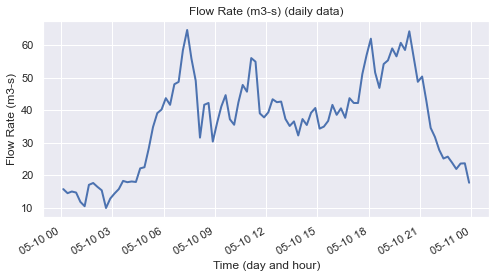

In [26]:
# Change line width of lines in matplotlib
dfT['value'].plot(linewidth=2,figsize=[8,4]).set_title('Flow Rate (m3-s) (daily data)')
plt.xlabel('Time (day and hour)')
plt.ylabel('Flow Rate (m3-s)')

## Forecast quality metrics
Before we begin forecasting, let's understand how to measure the quality of our predictions and take a look at the most commonly used metrics.

In [ ]:
sklearn.metrics.r2_score
sklearn.metrics.mean_absolute_error
sklearn.metrics.median_absolute_error
sklearn.metrics.mean_squared_error
sklearn.metrics.mean_squared_log_error

In [58]:
def mean_absolute_percentage_error(y_true, y_pred): 
    # Calculate the absolute value element-wise
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Now that we know how to measure the quality of the forecasts, let's see what metrics we can use and how to translate the results for the boss. After that, one small detail remains - building the model.

# 2. Move, smoothe, evaluate

Let's start with a naive hypothesis: "tomorrow will be the same as today". However, instead of a model like y^t=yt−1 (which is actually a great baseline for any time series prediction problems and sometimes is impossible to beat), we will assume that the future value of our variable depends on the average of its k previous values. Therefore, we will use the moving average.

#### Train

In [28]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(df, 24) # prediction for the last observed day (past 24 hours)

35.96867743041667

#### Test

In [29]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(dfT, 24) # prediction for the last observed day (past 24 hours)

42.62952968416666

Unfortunately, we cannot make predictions far in the future -- in order to get the value for the next step, we need the previous values to be actually observed. But moving average has another use case - smoothing the original time series to identify trends. Pandas has an implementation available with DataFrame.rolling(window).mean(). The wider the window, the smoother the trend. In the case of very noisy data, which is often encountered in finance, this procedure can help detect common patterns.

In [30]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

#### Train

Let's smooth by the previous 4 hours.

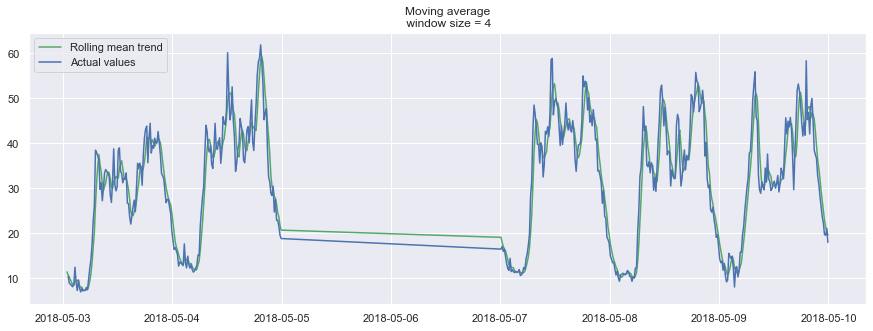

In [31]:
plotMovingAverage(df, 4)

Now let's try smoothing by the previous 12 hours.

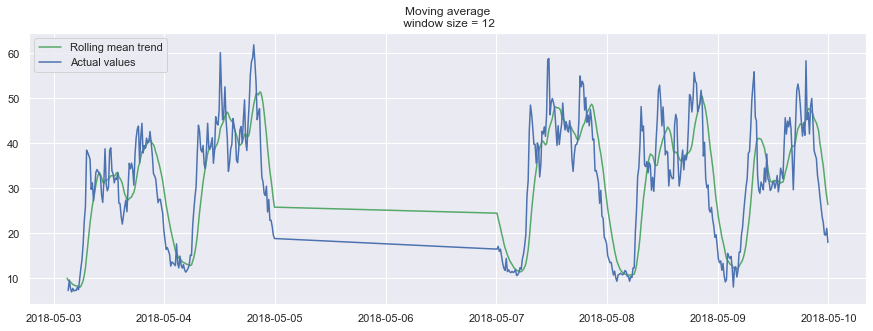

In [32]:
plotMovingAverage(df, 12) 

Now with the previous 24 hours, we get the daily trend.

### Daily Trend

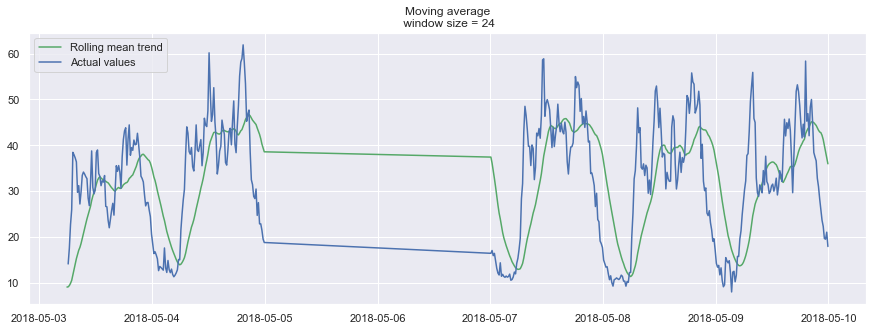

In [33]:
plotMovingAverage(df, 24)

When we applied daily smoothing to the hourly data, we could clearly see the dynamics of the flow rate. During periods of greater movement and meals there is a greater consumption of water, while at night the flow is minimal.

We can also plot confidence intervals for our smoothed values.

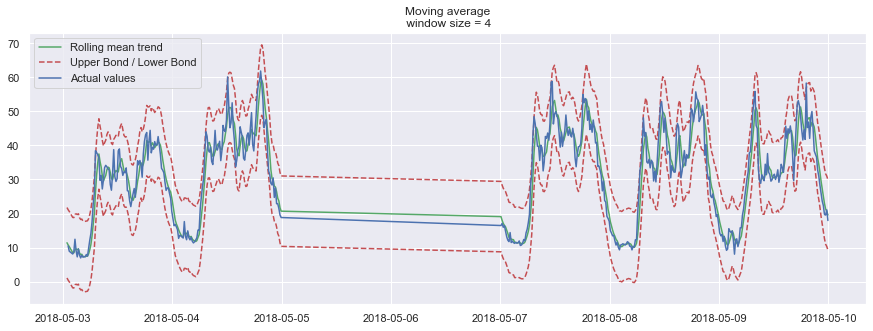

In [34]:
plotMovingAverage(df, 4, plot_intervals=True)

Now, let's create a simple anomaly detection system with the help of moving average. Unfortunately, in this particular dataset, everything is more or less normal, so we will intentionally make one of the values abnormal in our dataframe ads_anomaly.

In [35]:
ads_anomaly = df.copy()
ads_anomaly.iloc[-20] = ads_anomaly.iloc[-20] * 0.2 # say we have 80% drop of ads 

Let's see if this simple method can catch the anomaly.

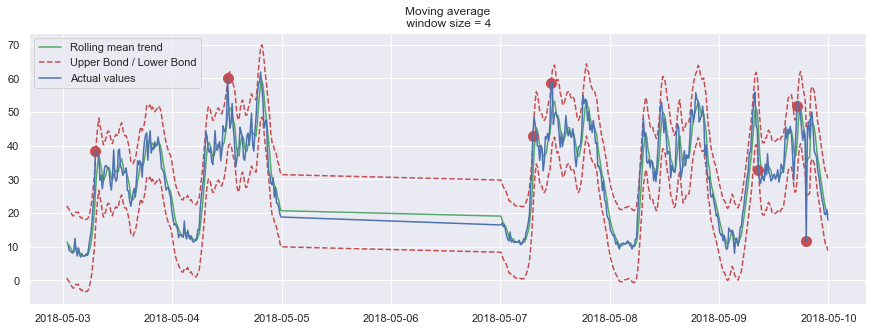

In [36]:
plotMovingAverage(ads_anomaly, 4, plot_intervals=True, plot_anomalies=True)

Neat! What about the second series?

#### Test

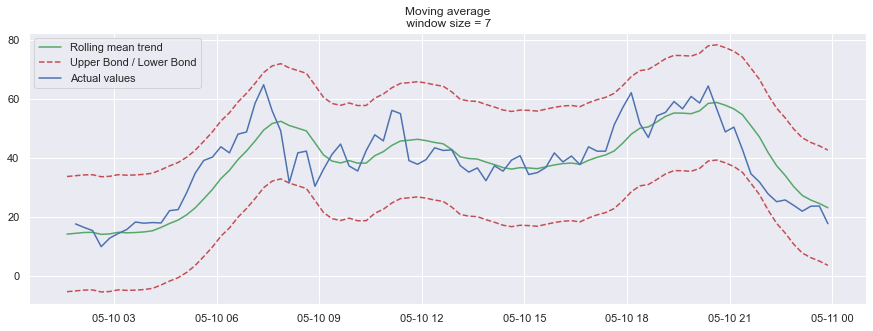

In [37]:
plotMovingAverage(dfT, 7, plot_intervals=True, plot_anomalies=True) # weekly smoothing

In [ ]:
# If you want to avoid false positives, it is best to consider more complex models.

Weighted average is a simple modification to the moving average. The weights sum up to 1 with larger weights assigned to more recent observations.

In [39]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [40]:
weighted_average(df, [0.6, 0.3, 0.1])

19.047049444000002

## Exponential smoothing

Now, let's see what happens if, instead of weighting the last k values of the time series, we start weighting all available observations while exponentially decreasing the weights as we move further back in time. There exists a formula for exponential smoothing that will help us with thiS: x

Here the model value is a weighted average between the current true value and the previous model values. The α weight is called a smoothing factor. It defines how quickly we will "forget" the last available true observation. The smaller α is, the more influence the previous observations have and the smoother the series is.

Exponentiality is hidden in the recursiveness of the function -- we multiply by (1−α)
each time, which already contains a multiplication by (1−α) of previous model values.


In [41]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [42]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

#### Train

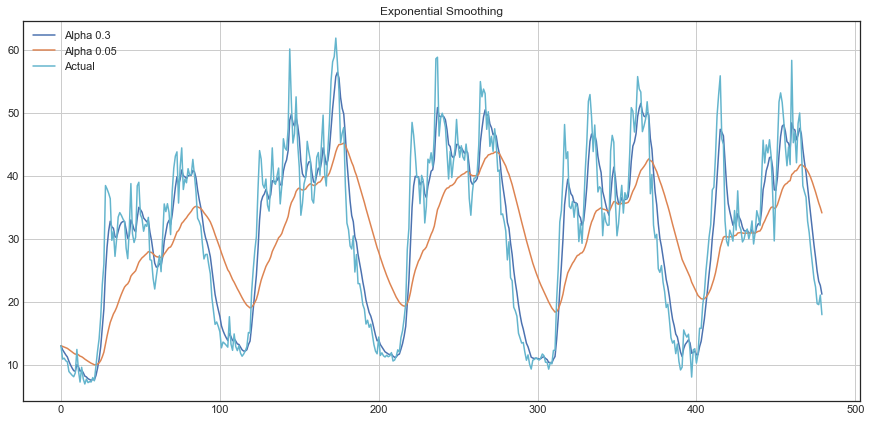

In [43]:
plotExponentialSmoothing(df.value, [0.3, 0.05])

#### Test

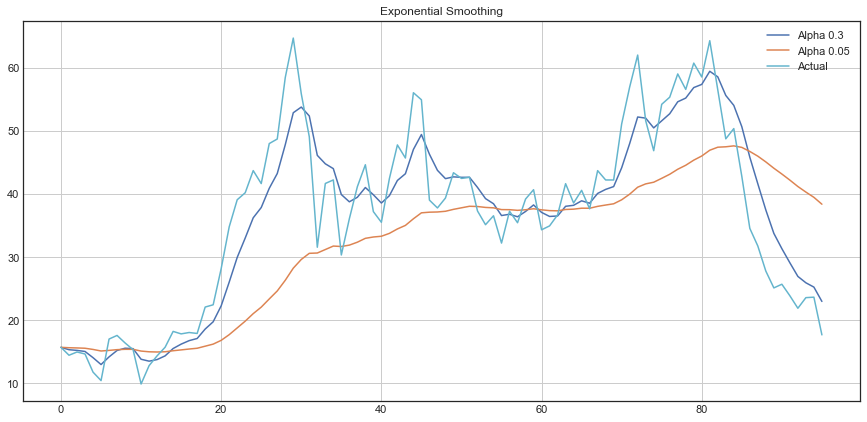

In [44]:
plotExponentialSmoothing(dfT.value, [0.3, 0.05])

### Double exponential smoothing

Up to now, the methods that we've discussed have been for a single future point prediction (with some nice smoothing). That is cool, but it is also not enough. Let's extend exponential smoothing so that we can predict two future points (of course, we will also include more smoothing).

Series decomposition will help us -- we obtain two components: intercept (i.e. level) ℓ and slope (i.e. trend) b. We have learnt to predict intercept (or expected series value) with our previous methods; now, we will apply the same exponential smoothing to the trend by assuming that the future direction of the time series changes depends on the previous weighted changes. As a result, we get the following set of functions: X

The first one describes the intercept, which, as before, depends on the current value of the series. The second term is now split into previous values of the level and of the trend. The second function describes the trend, which depends on the level changes at the current step and on the previous value of the trend. In this case, the β coefficient is a weight for exponential smoothing. The final prediction is the sum of the model values of the intercept and trend.

In [45]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

#### Train

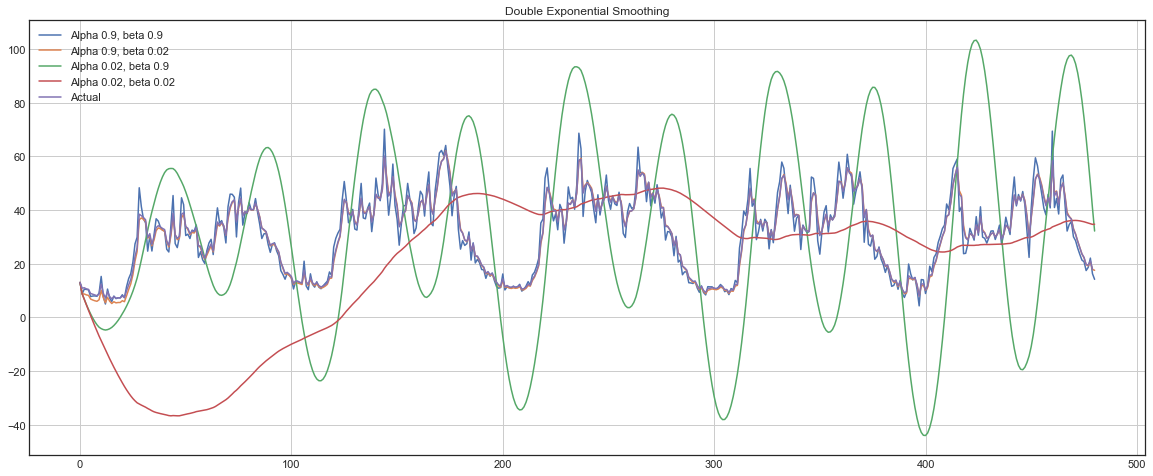

In [46]:
plotDoubleExponentialSmoothing(df.value, alphas=[0.9, 0.02], betas=[0.9, 0.02])

#### Test

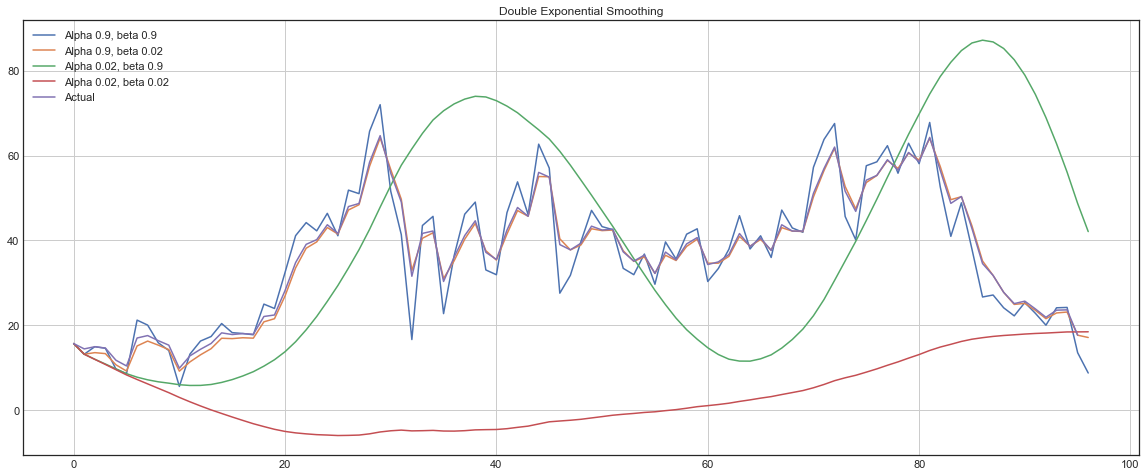

In [47]:
plotDoubleExponentialSmoothing(dfT.value, alphas=[0.9, 0.02], betas=[0.9, 0.02])

Now we have to tune two parameters: α and β. The former is responsible for the series smoothing around the trend, the latter for the smoothing of the trend itself. The larger the values, the more weight the most recent observations will have and the less smoothed the model series will be. Certain combinations of the parameters may produce strange results, especially if set manually. We'll look into choosing parameters automatically in a bit; before that, let's discuss triple exponential smoothing.

### Triple exponential smoothing a.k.a. Holt-Winters

We've looked at exponential smoothing and double exponential smoothing. This time, we're going into triple exponential smoothing.

As you could have guessed, the idea is to add a third component - seasonality. This means that we should not use this method if our time series is not expected to have seasonality. Seasonal components in the model will explain repeated variations around intercept and trend, and it will be specified by the length of the season, in other words by the period after which the variations repeat. For each observation in the season, there is a separate component; for example, if the length of the season is 7 days (a weekly seasonality), we will have 7 seasonal components, one for each day of the week.

With this, let's write out a new system of equations: X

The intercept now depends on the current value of the series minus any corresponding seasonal component. Trend remains unchanged, and the seasonal component depends on the current value of the series minus the intercept and on the previous value of the component. Take into account that the component is smoothed through all the available seasons; for example, if we have a Monday component, then it will only be averaged with other Mondays. You can read more on how averaging works and how the initial approximation of the trend and seasonal components is done here. Now that we have the seasonal component, we can predict not just one or two steps ahead but an arbitrary m future steps ahead, which is very encouraging.

Below is the code for a triple exponential smoothing model, which is also known by the last names of its creators, Charles Holt and his student Peter Winters. Additionally, the Brutlag method was included in the model to produce confidence intervals: X

where T is the length of the season, d is the predicted deviation. Other parameters were taken from triple exponential smoothing. You can read more about the method and its applicability to anomaly detection in time series here.

In [48]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

## Time series cross validation

Before we start building a model, let's first discuss how to estimate model parameters automatically.

There is nothing unusual here; as always, we have to choose a loss function suitable for the task that will tell us how closely the model approximates the data. Then, using cross-validation, we will evaluate our chosen loss function for the given model parameters, calculate the gradient, adjust the model parameters, and so on, eventually descending to the global minimum.

You may be asking how to do cross-validation for time series because time series have this temporal structure and one cannot randomly mix values in a fold while preserving this structure. With randomization, all time dependencies between observations will be lost. This is why we will have to use a more tricky approach in optimizing the model parameters. I don't know if there's an official name to this, but on CrossValidated, where one can find all answers but the Answer to the Ultimate Question of Life, the Universe, and Everything, the proposed name for this method is "cross-validation on a rolling basis".

The idea is rather simple -- we train our model on a small segment of the time series from the beginning until some t, make predictions for the next t+n steps, and calculate an error. Then, we expand our training sample to t+n value, make predictions from t+n until t+2∗n, and continue moving our test segment of the time series until we hit the last available observation. As a result, we have as many folds as n will fit between the initial training sample and the last observation.

Now, knowing how to set up cross-validation, we can find the optimal parameters for the Holt-Winters model. Recall that we have daily seasonality in ads, hence the slen=24 parameter.

In [51]:
def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In the Holt-Winters model, as well as in the other models of exponential smoothing, there's a constraint on how large the smoothing parameters can be, each of them ranging from 0 to 1. Therefore, in order to minimize our loss function, we have to choose an algorithm that supports constraints on model parameters. In our case, we will use the truncated Newton conjugate gradient.

In [61]:
%%time
data = df.value[:-20] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 50, scaling_factor = 3)
model.triple_exponential_smoothing()

0.06229671050147806 0.013191637697457903 0.0
Wall time: 2.35 s


Let's add some code to render plots.

In [62]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

#### Train

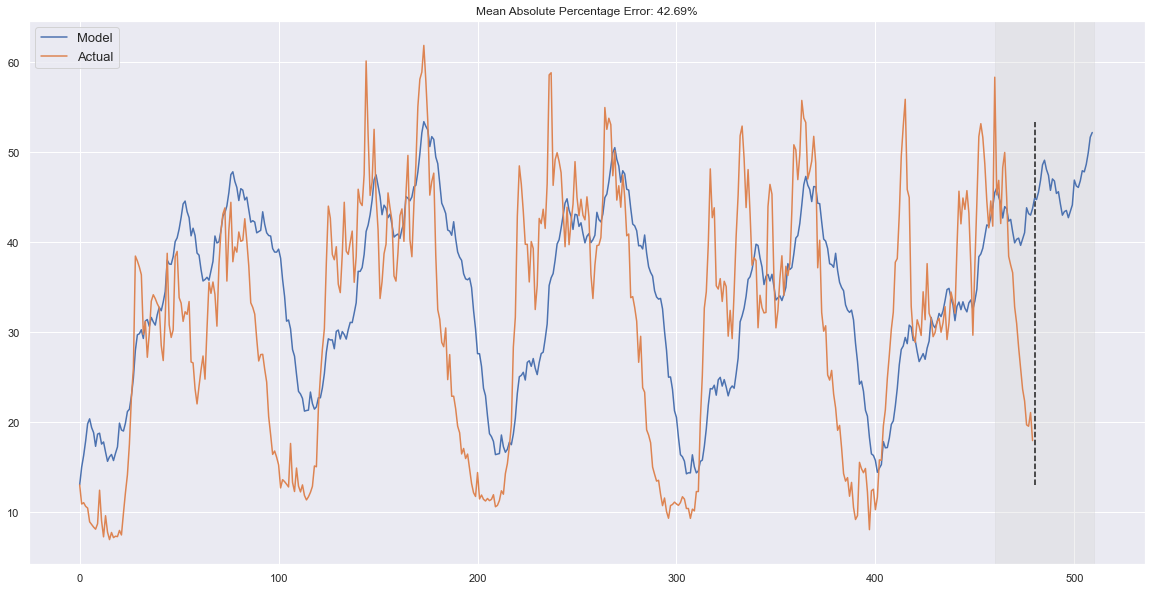

In [63]:
plotHoltWinters(df.value)

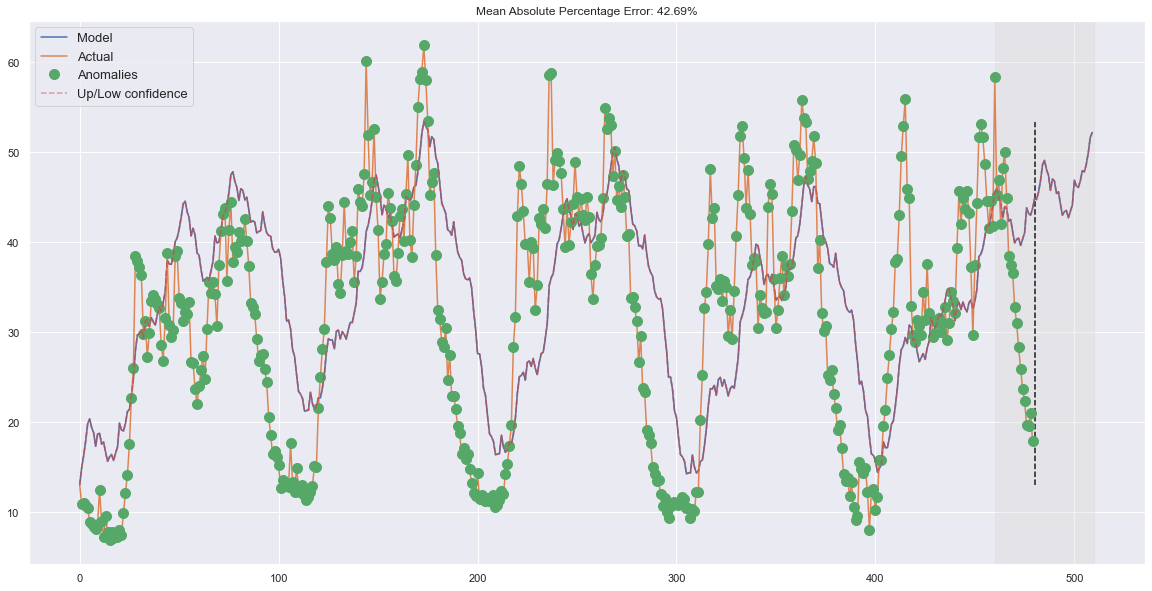

In [64]:
plotHoltWinters(df.value, plot_intervals=True, plot_anomalies=True)

Judging by the plots, our model was not able to successfully approximate the initial time series, capturing the daily seasonality, overall downwards trend, and even some anomalies. If you look at the model deviations, you can clearly see that the model reacts quite sharply to changes in the structure of the series but then quickly returns the deviation to the normal values, essentially "forgetting" the past. This feature of the model allows us to quickly build anomaly detection systems, even for noisy series data, without spending too much time and money on preparing the data and training the model.

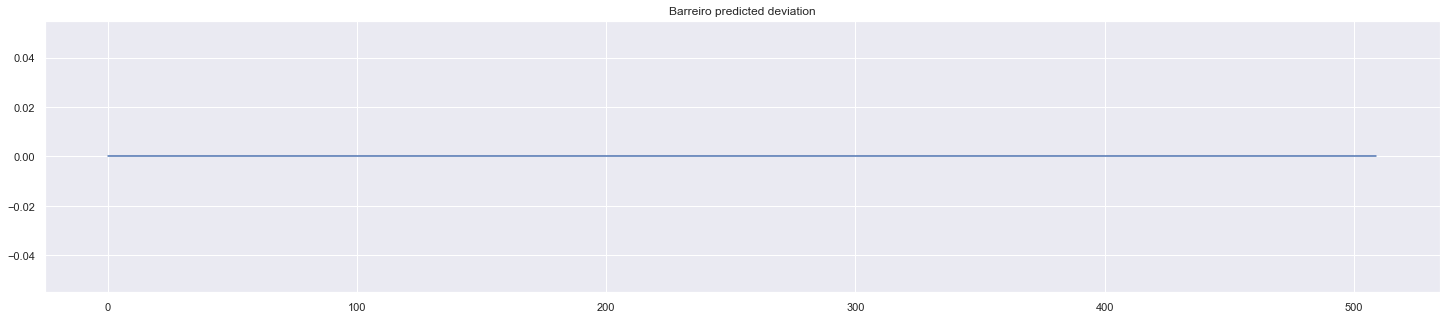

In [66]:
plt.figure(figsize=(25, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Barreiro predicted deviation");

We'll apply the same algorithm for the second series.

#### Test

In [76]:
%%time
data = dfT.value[:-50] 
slen = 5 # 1-day seasonality

x = [0, 0, 0] 

opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_absolute_percentage_error, slen), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

model = HoltWinters(data, slen = slen, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 100, scaling_factor = 3)
model.triple_exponential_smoothing()

1.0 0.0 0.1469792815724445
Wall time: 56.9 ms


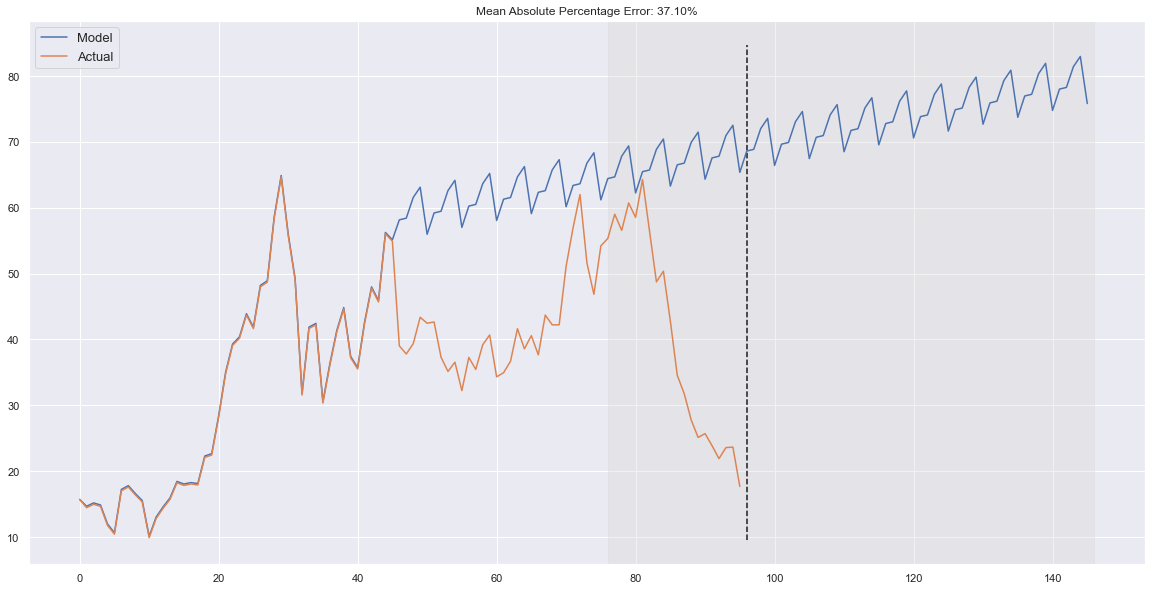

In [77]:
plotHoltWinters(dfT.value)

In [ ]:
# Looks good! The model caught both upwards trend and seasonal spikes and fits the data quite nicely.

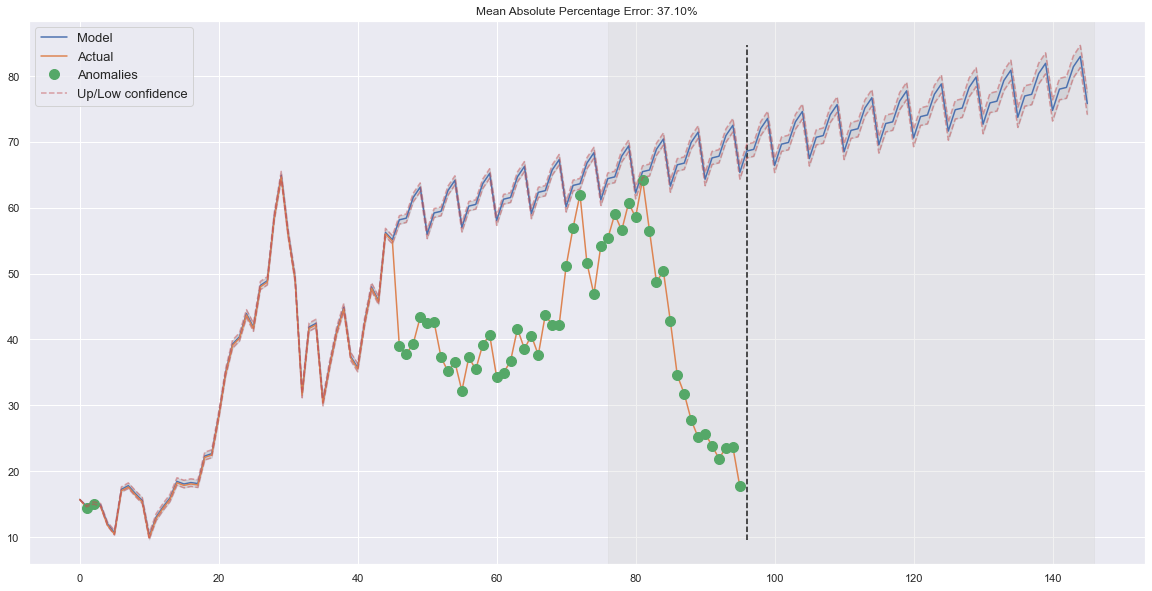

In [78]:
plotHoltWinters(dfT.value, plot_intervals=True, plot_anomalies=True)

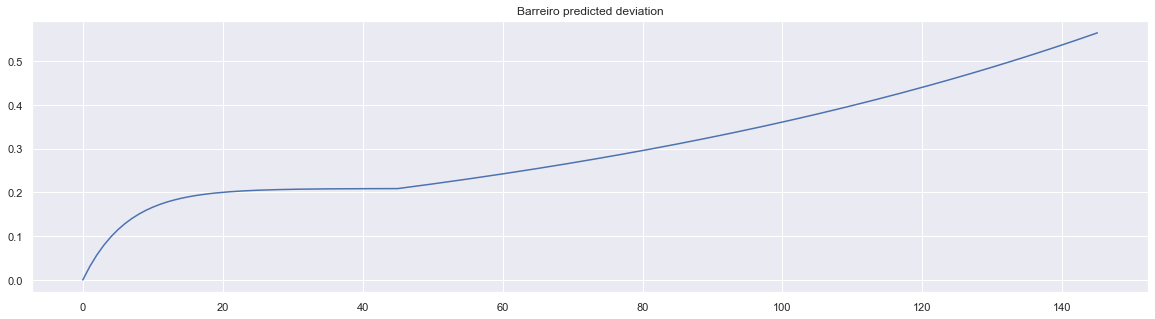

In [79]:
plt.figure(figsize=(20, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Barreiro predicted deviation");

# 3. Econometric approach

### Stationarity

Before we start modeling, we should mention such an important property of time series: stationarity.

If a process is stationary, that means it does not change its statistical properties over time, namely its mean and variance. (The constancy of variance is called homoscedasticity)The covariance function does not depend on time; it should only depend on the distance between observations.

...

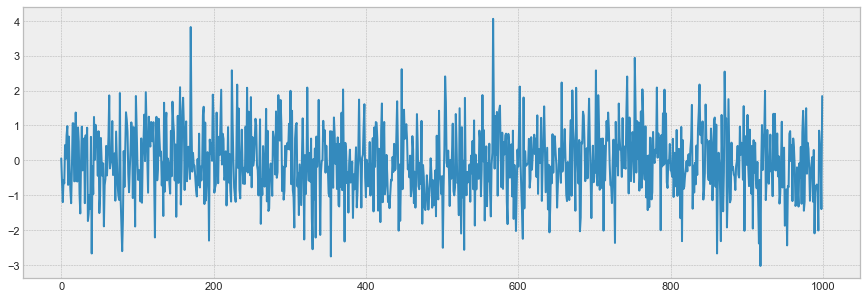

In [80]:
white_noise = np.random.normal(size=1000)
with plt.style.context('bmh'):  
    plt.figure(figsize=(15, 5))
    plt.plot(white_noise)

The process generated by the standard normal distribution is stationary and oscillates around 0 with with deviation of 1. Now, based on this process, we will generate a new one where each subsequent value will depend on the previous one: xt=ρxt−1+et

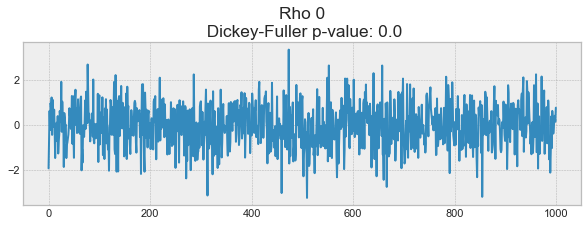

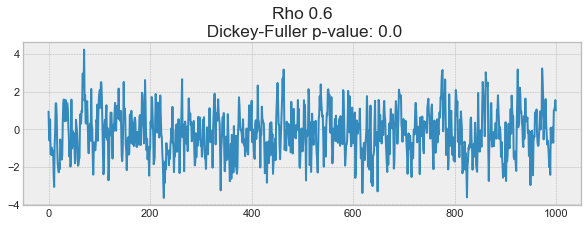

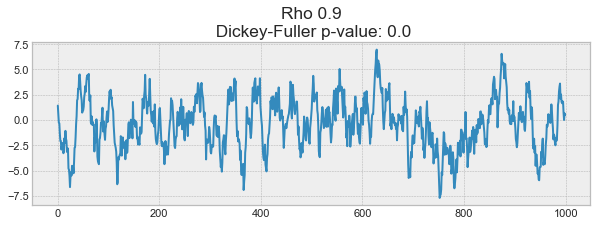

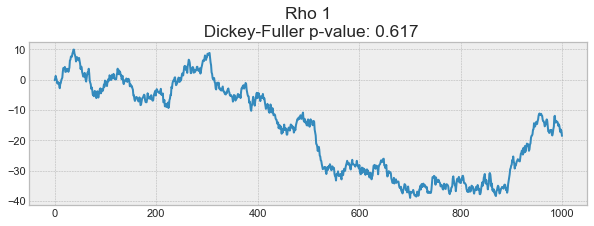

In [83]:
def plotProcess(n_samples=1000, rho=0):
    x = w = np.random.normal(size=n_samples)
    for t in range(n_samples):
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(sm.tsa.stattools.adfuller(x)[1], 3)))
        
for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

#### ...

### Getting rid of non-stationarity and building SARIMA

In [84]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

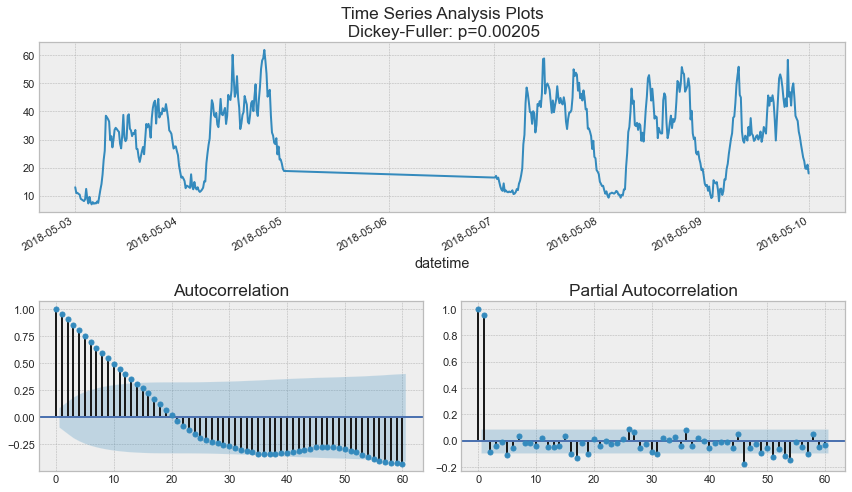

In [85]:
tsplot(df.value, lags=60)

Surprisingly, the initial series are stationary; the Dickey-Fuller test rejected the null hypothesis that a unit root is present. Actually, we can see this on the plot itself -- we do not have a visible trend, so the mean is constant and the variance is pretty much stable. The only thing left is seasonality, which we have to deal with prior to modeling. To do so, let's take the "seasonal difference", which means a simple subtraction of the series from itself with a lag that equals the seasonal period.

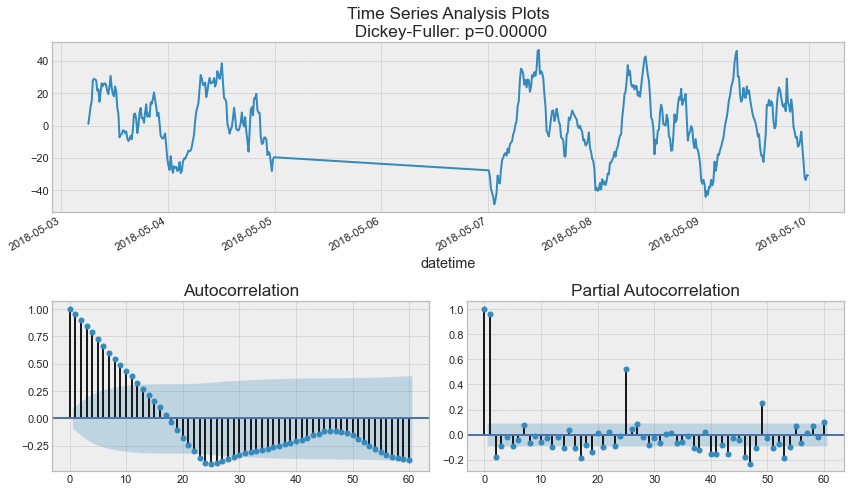

In [86]:
ads_diff = df.value - df.value.shift(24)
tsplot(ads_diff[24:], lags=60)

In [ ]:
# Perfect! Our series now looks like something undescribable, oscillating around zero. The Dickey-Fuller test indicates that it is stationary, and the number of significant peaks in ACF has dropped. We can finally start modeling!

### ARIMA-family Crash-Course
...

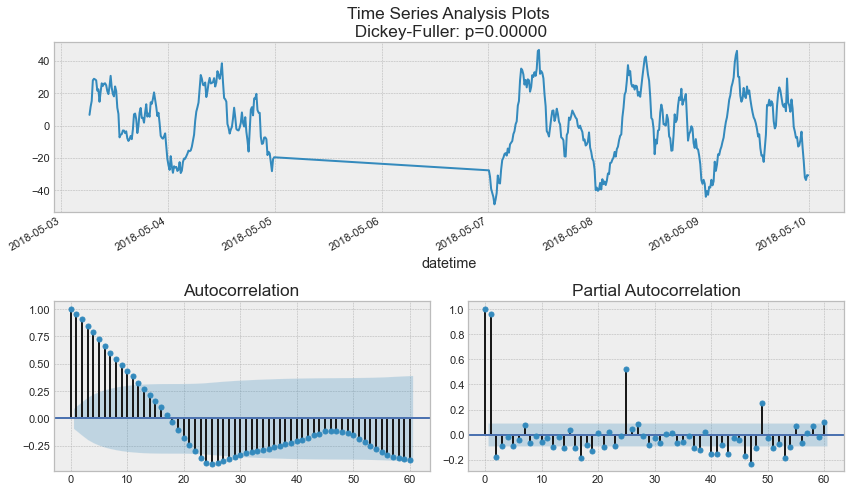

In [87]:
tsplot(ads_diff[24+1:], lags=60)

Let's test various models and see which one is better.

In [90]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [91]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [94]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)

<ipython-input-91-b23fdd1f9103>:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameters_list):


ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [ ]:
result_table.head()

In [ ]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

In [ ]:
tsplot(best_model.resid[24+1:], lags=60)

It is clear that the residuals are stationary, and there are no apparent autocorrelations. Let's make predictions using our model.

In [ ]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

In [ ]:
plotSARIMA(df, best_model, 50)

# 4. Non-Linear (and not quite) models on time series

#### ...

# Random Forest

## Feature extraction

### Lags of time series

In [114]:
# Creating a copy of the initial dataframe to make various transformations 
data = pd.DataFrame(df.value.copy())
data.columns = ["y"]

In [115]:
data

y
datetime                      
2018-05-03 00:07:30  13.026578
2018-05-03 00:22:30  10.898906
2018-05-03 00:37:30  11.048772
2018-05-03 00:52:30  10.641706
2018-05-03 01:07:30  10.452578
...                        ...
2018-05-09 22:52:30  22.357783
2018-05-09 23:07:30  19.707922
2018-05-09 23:22:30  19.546844
2018-05-09 23:37:30  21.068406
2018-05-09 23:52:30  17.953072

[480 rows x 1 columns]

In [116]:
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data["lag_{}".format(i)] = df.value.shift(i)

In [117]:
data

y      lag_6      lag_7      lag_8      lag_9  \
datetime                                                                     
2018-05-03 00:07:30  13.026578        NaN        NaN        NaN        NaN   
2018-05-03 00:22:30  10.898906        NaN        NaN        NaN        NaN   
2018-05-03 00:37:30  11.048772        NaN        NaN        NaN        NaN   
2018-05-03 00:52:30  10.641706        NaN        NaN        NaN        NaN   
2018-05-03 01:07:30  10.452578        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
2018-05-09 22:52:30  22.357783  36.618228  37.464811  38.432406  44.922167   
2018-05-09 23:07:30  19.707922  32.801550  36.618228  37.464811  38.432406   
2018-05-09 23:22:30  19.546844  30.982689  32.801550  36.618228  37.464811   
2018-05-09 23:37:30  21.068406  28.309133  30.982689  32.801550  36.618228   
2018-05-09 23:52:30  17.953072  25.941972  28.309133  30.982689  32.801550   

                        lag_10     lag_11     lag_12     lag_13     lag_14  \
datetime                                                                     
2018-05-03 00:07:30        NaN        NaN        NaN        NaN        NaN   
2018-05-03 00:22:30        NaN        NaN        NaN        NaN        NaN   
2018-05-03 00:37:30        NaN        NaN        NaN        NaN        NaN   
2018-05-03 00:52:30        NaN        NaN        NaN        NaN        NaN   
2018-05-03 01:07:30        NaN        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
2018-05-09 22:52:30  49.984489  48.309733  42.084417  46.882167  45.267233   
2018-05-09 23:07:30  44.922167  49.984489  48.309733  42.084417  46.882167   
2018-05-09 23:22:30  38.432406  44.922167  49.984489  48.309733  42.084417   
2018-05-09 23:37:30  37.464811  38.432406  44.922167  49.984489  48.309733   
2018-05-09 23:52:30  36.618228  37.464811  38.432406  44.922167  49.984489   

                        lag_15     lag_16     lag_17     lag_18     lag_19  \
datetime                                                                     
2018-05-03 00:07:30        NaN        NaN        NaN        NaN        NaN   
2018-05-03 00:22:30        NaN        NaN        NaN        NaN        NaN   
2018-05-03 00:37:30        NaN        NaN        NaN        NaN        NaN   
2018-05-03 00:52:30        NaN        NaN        NaN        NaN        NaN   
2018-05-03 01:07:30        NaN        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
2018-05-09 22:52:30  58.348900  41.791500  44.595922  41.606544  44.602767   
2018-05-09 23:07:30  45.267233  58.348900  41.791500  44.595922  41.606544   
2018-05-09 23:22:30  46.882167  45.267233  58.348900  41.791500  44.595922   
2018-05-09 23:37:30  42.084417  46.882167  45.267233  58.348900  41.791500   
2018-05-09 23:52:30  48.309733  42.084417  46.882167  45.267233  58.348900   

                        lag_20     lag_21     lag_22     lag_23     lag_24  
datetime                                                                    
2018-05-03 00:07:30        NaN        NaN        NaN        NaN        NaN  
2018-05-03 00:22:30        NaN        NaN        NaN        NaN        NaN  
2018-05-03 00:37:30        NaN        NaN        NaN        NaN        NaN  
2018-05-03 00:52:30        NaN        NaN        NaN        NaN        NaN  
2018-05-03 01:07:30        NaN        NaN        NaN        NaN        NaN  
...                        ...        ...        ...        ...        ...  
2018-05-09 22:52:30  48.713311  51.659339  53.182956  51.746803  44.381839  
2018-05-09 23:07:30  44.602767  48.713311  51.659339  53.182956  51.746803  
2018-05-09 23:22:30  41.606544  44.602767  48.713311  51.659339  53.182956  
2018-05-09 23:37:30  44.595922  41.606544  44.602767  48.713311  51.659339  
2018-05-09 23:52:30  41.791500  44.595922  41.606544  44.602

In [118]:
# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [119]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [121]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [122]:
# machine learning in two lines
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.6081476465288788

In [123]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

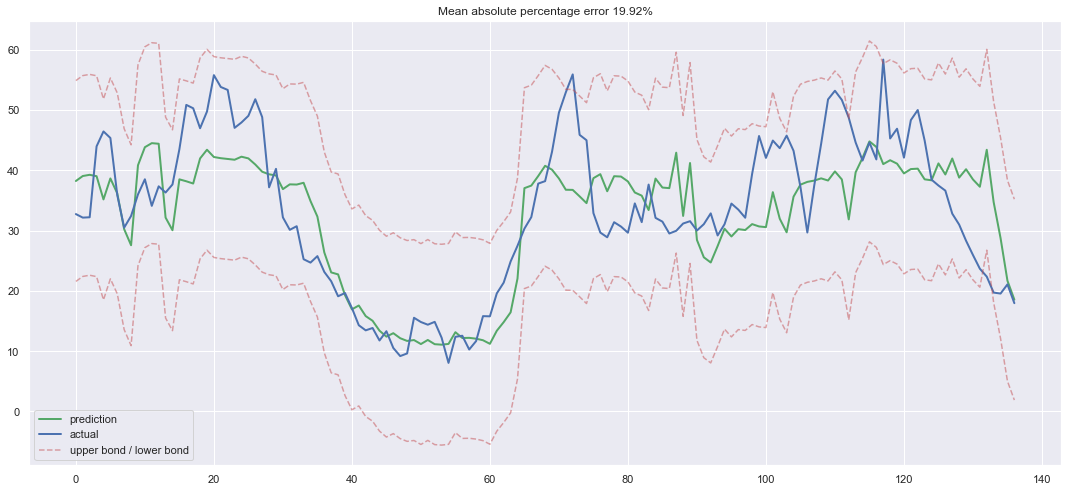

In [124]:
plotModelResults(rf, plot_intervals=True)
# plotCoefficients(rf)

Simple lags and Random Forest gave us predictions that are not that far off from SARIMA in terms of quality. There are many unnecessary features, so we'll do feature selection in a little while. For now, let's continue engineering!

We'll add hour, day of week, and a boolean for is_weekend. To do so, we need to transform the current dataframe index into the datetime format and extract hour and weekday.

In [125]:
data.index = pd.to_datetime(df.index)
data["hour"] = df.index.hour
data["weekday"] = df.index.weekday
# data['is_weekend'] = df.weekday.isin([5,6])*1
data.tail()

y      lag_6      lag_7      lag_8      lag_9  \
datetime                                                                     
2018-05-09 22:52:30  22.357783  36.618228  37.464811  38.432406  44.922167   
2018-05-09 23:07:30  19.707922  32.801550  36.618228  37.464811  38.432406   
2018-05-09 23:22:30  19.546844  30.982689  32.801550  36.618228  37.464811   
2018-05-09 23:37:30  21.068406  28.309133  30.982689  32.801550  36.618228   
2018-05-09 23:52:30  17.953072  25.941972  28.309133  30.982689  32.801550   

                        lag_10     lag_11     lag_12     lag_13     lag_14  \
datetime                                                                     
2018-05-09 22:52:30  49.984489  48.309733  42.084417  46.882167  45.267233   
2018-05-09 23:07:30  44.922167  49.984489  48.309733  42.084417  46.882167   
2018-05-09 23:22:30  38.432406  44.922167  49.984489  48.309733  42.084417   
2018-05-09 23:37:30  37.464811  38.432406  44.922167  49.984489  48.309733   
2018-05-09 23:52:30  36.618228  37.464811  38.432406  44.922167  49.984489   

                     ...     lag_17     lag_18     lag_19     lag_20  \
datetime             ...                                               
2018-05-09 22:52:30  ...  44.595922  41.606544  44.602767  48.713311   
2018-05-09 23:07:30  ...  41.791500  44.595922  41.606544  44.602767   
2018-05-09 23:22:30  ...  58.348900  41.791500  44.595922  41.606544   
2018-05-09 23:37:30  ...  45.267233  58.348900  41.791500  44.595922   
2018-05-09 23:52:30  ...  46.882167  45.267233  58.348900  41.791500   

                        lag_21     lag_22     lag_23     lag_24  hour  weekday  
datetime                                                                        
2018-05-09 22:52:30  51.659339  53.182956  51.746803  44.381839    22        2  
2018-05-09 23:07:30  48.713311  51.659339  53.182956  51.746803    23        2  
2018-05-09 23:22:30  44.602767  48.713311  51.659339  53.182956    23        2  
2018-05-09 23:37:30  41.606544  44.602767  48.713311  51.659339    23        2  
2018-05-09 23:52:30  44.595922  41.606544  44.602767  48.713311    23        2  

[5 rows x 22 columns]

We can visualize the resulting features.

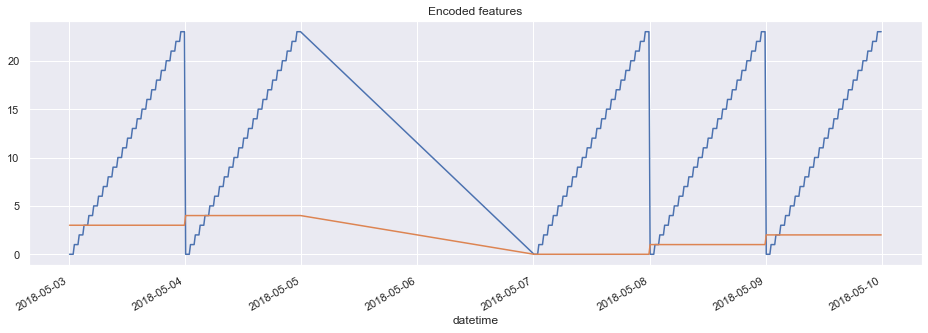

In [126]:
plt.figure(figsize=(16, 5))
plt.title("Encoded features")
data.hour.plot()
data.weekday.plot()
# df.is_weekend.plot()
plt.grid(True);

Since we now have different scales in our variables, thousands for the lag features and tens for categorical, we need to transform them into same scale for exploring feature importance and, later, regularization.

In [127]:
scaler = StandardScaler()

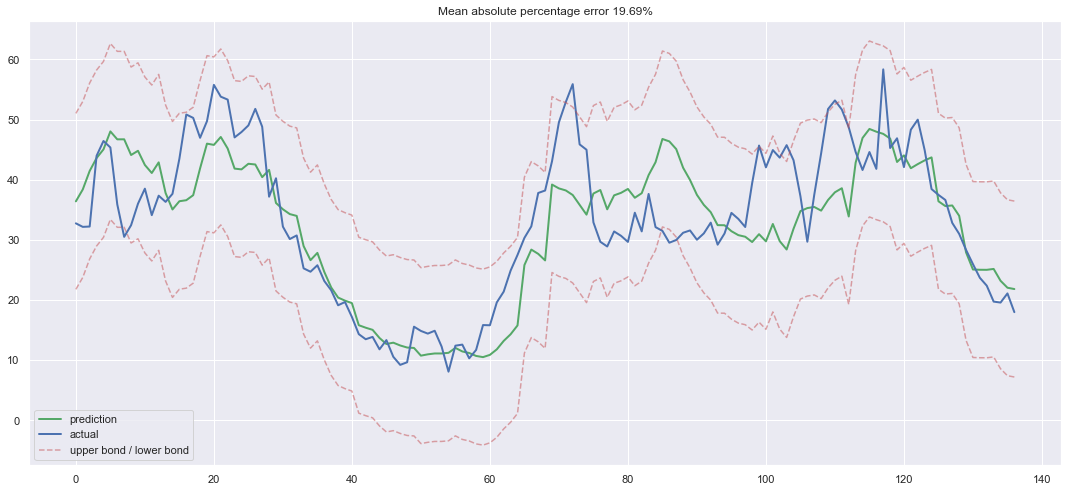

In [130]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_scaled, y_train)

plotModelResults(rf, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
# plotCoefficients(rf)

The test error goes down a little bit. Judging by the coefficients plot, we can say that weekday are a useful feature.

## Target enconding

I'd like to add another variant for encoding categorical variables: encoding by mean value. If it is undesirable to explode a dataset by using many dummy variables that can lead to the loss of information and if they cannot be used as real values because of the conflicts like "0 hours < 23 hours", then it's possible to encode a variable with slightly more interpretable values. The natural idea is to encode with the mean value of the target variable. In our example, every day of the week and every hour of the day can be encoded by the corresponding average number of ads watched during that day or hour. It's very important to make sure that the mean value is calculated over the training set only (or over the current cross-validation fold only) so that the model is not aware of the future.

In [131]:
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

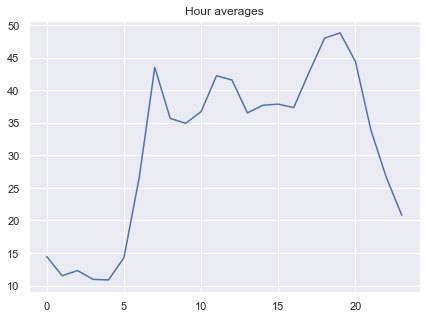

In [133]:
average_hour = code_mean(data, 'hour', "y")
plt.figure(figsize=(7, 5))
plt.title("Hour averages")
pd.DataFrame.from_dict(average_hour, orient='index')[0].plot()
plt.grid(True);

Let's put all the transformations together in a single function .

In [140]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
    """
        series: pd.DataFrame
            dataframe with timeseries

        lag_start: int
            initial step back in time to slice target variable 
            example - lag_start = 1 means that the model 
                      will see yesterday's values to predict today

        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model 
                      will see up to 4 days back in time to predict today

        test_size: float
            size of the test dataset after train/test split as percentage of dataset

        target_encoding: boolean
            if True - add target averages to the dataset
        
    """
    
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    
    # datetime features
    data.index = pd.to_datetime(data.index)
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
#    data['is_weekend'] = data.weekday.isin([5,6])*1
    
    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "y").get, data.hour))

        # frop encoded variables 
        data.drop(["hour", "weekday"], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test

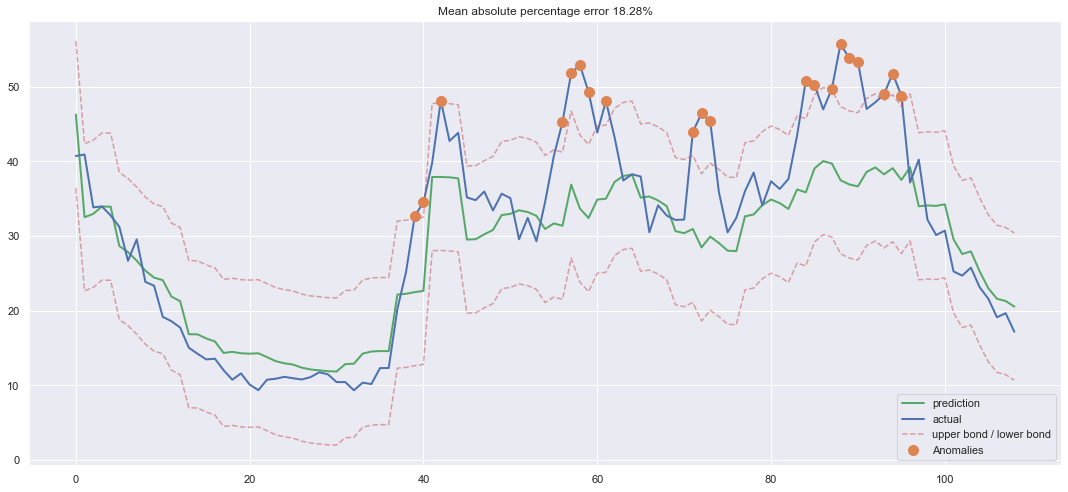

In [141]:
X_train, X_test, y_train, y_test = prepareData(df.value, lag_start=6, lag_end=25, test_size=0.3, target_encoding=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_scaled, y_train)

plotModelResults(rf, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=True)
# plotCoefficients(rf)

We see some overfitting! Hour_average was so great in the training dataset that the model decided to concentrate all of its forces on it. As a result, the quality of prediction dropped. This problem can be solved in a variety of ways; for example, we can calculate the target encoding not for the whole train set, but for some window instead. That way, encodings from the last observed window will most likely better describe the current series state. Alternatively, we can just drop it manually since we are sure that it makes things only worse in this case.

In [142]:
X_train, X_test, y_train, y_test =\
prepareData(df.value, lag_start=6, lag_end=25, test_size=0.3, target_encoding=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regularization and feature selection

As we already know, not all features are equally healthy -- some may lead to overfitting while others should be removed. Besides manual inspection, we can apply regularization. Two of the most popular regression models with regularization are Ridge and Lasso regressions. They both add some more constrains to our loss function.

In the case of Ridge regression, those constraints are the sum of squares of the coefficients multiplied by the regularization coefficient. The bigger the coefficient a feature has, the bigger our loss will be. Hence, we will try to optimize the model while keeping the coefficients fairly low.

As a result of this L2 regularization, we will have higher bias and lower variance, so the model will generalize better (at least that's what we hope will happen).

The second regression model, Lasso regression, adds to the loss function, not squares, but absolute values of the coefficients. As a result, during the optimization process, coefficients of unimportant features may become zeroes, which allows for automated feature selection. This regularization type is called L1.

First, let's make sure that we have features to drop and that the data has highly correlated features.

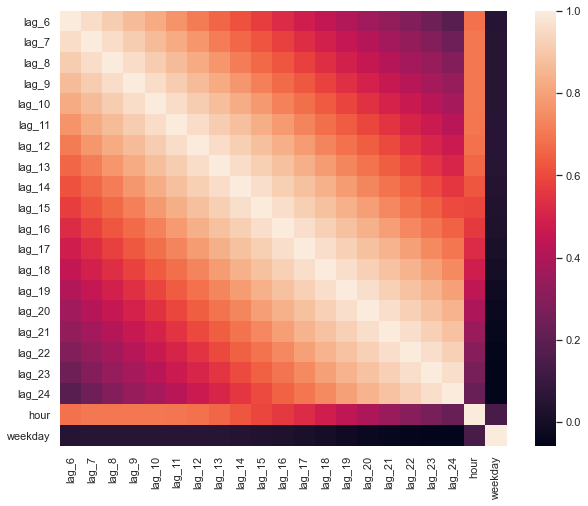

In [143]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

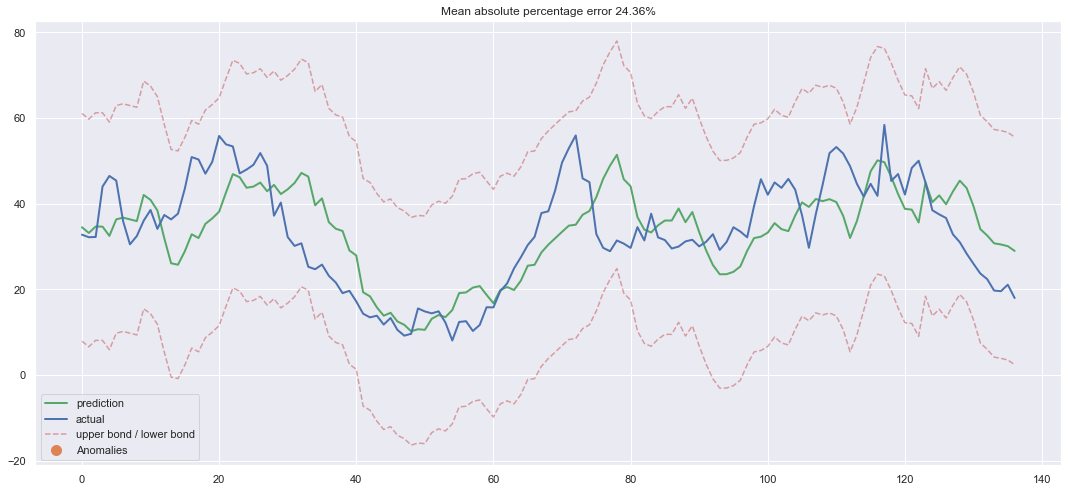

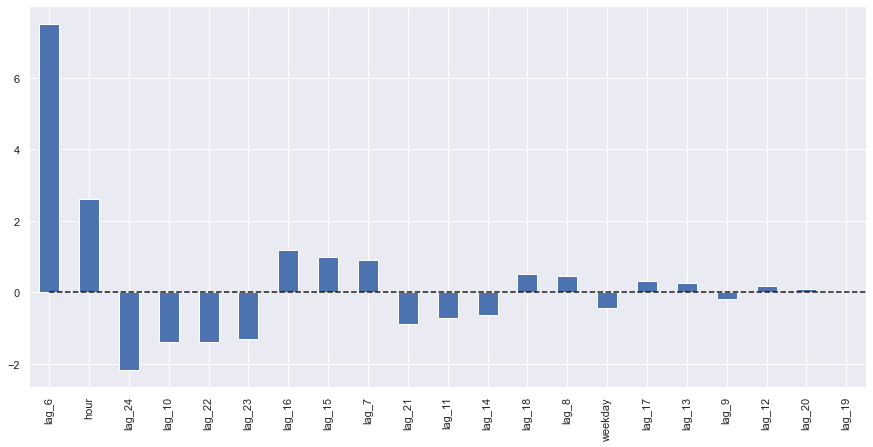

In [145]:
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

We can clearly see some coefficients are getting closer and closer to zero (though they never actually reach it) as their importance in the model drops.

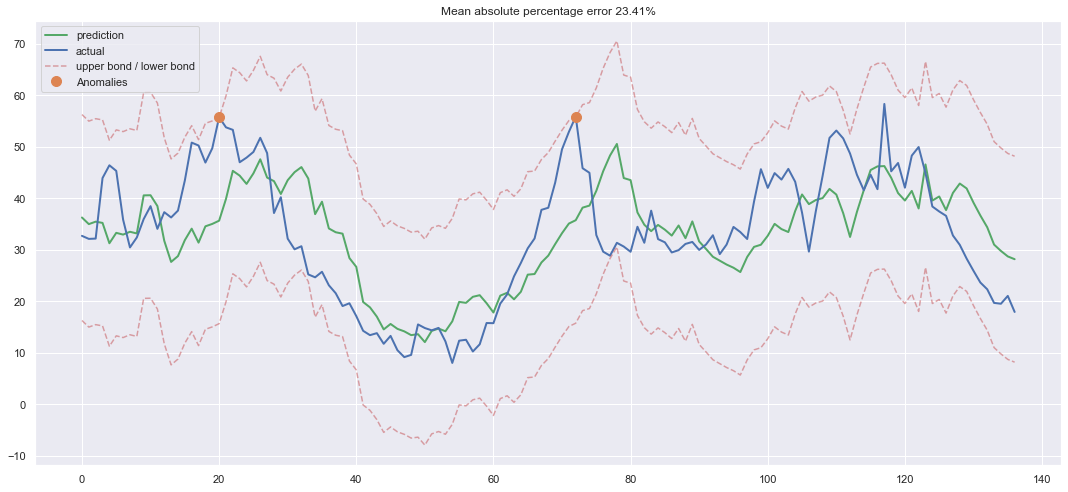

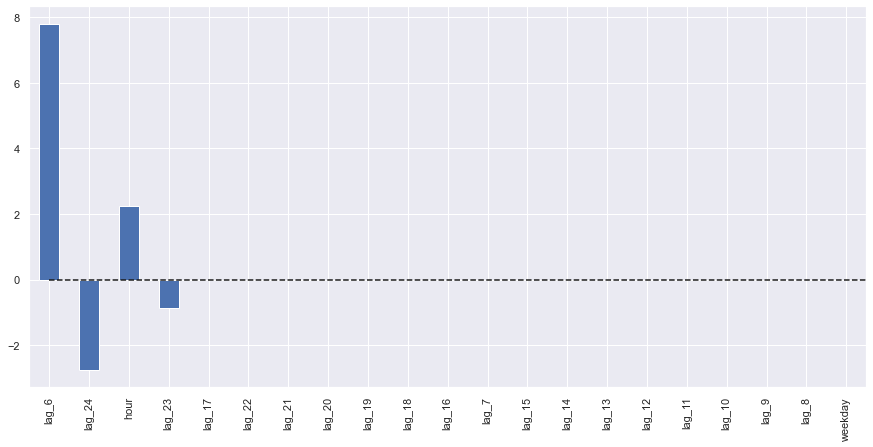

In [146]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

Lasso regression turned out to be more conservative; it removed 23-rd lag from the most important features and dropped 5 features completely, which only made the quality of prediction better.

## XGBoost

In [148]:
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

C:\Users\Catarina\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


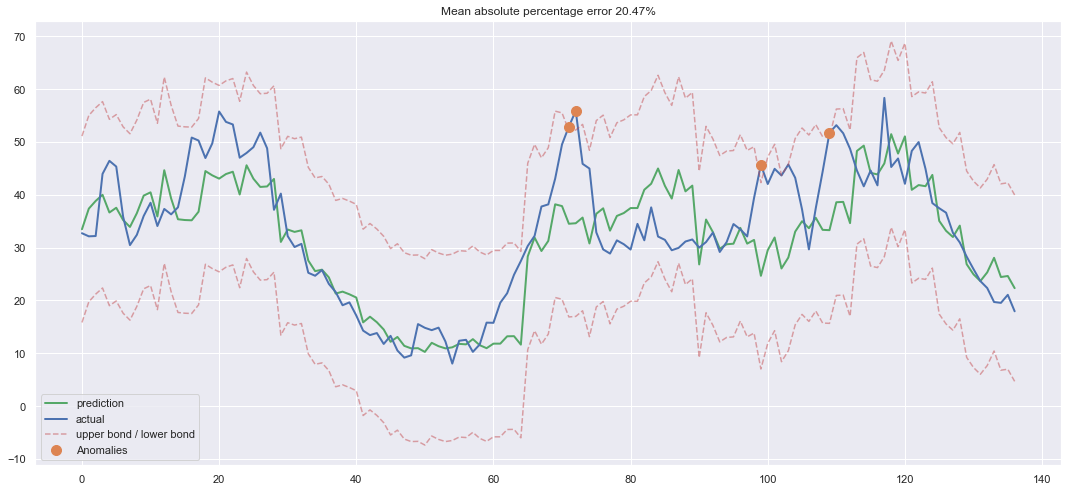

In [149]:
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

Random Forest, the winner! This is the smallest error on the test set among all the models we've tried so far.

XGBoost, this results is decieving, and it might not be the brightest idea to fit xgboost as soon as you get your hands on time series data. Generally, tree-based models handle trends in data poorly when compared with linear models. In that case, you would have to detrend your series first or use some tricks to make the magic happen. Ideally, you can make the series stationary and then use XGBoost. For example, you can forecast trend separately with a linear model and then add predictions from xgboost to get a final forecast.

# Conclusion

We discussed different time series analysis and prediction methods. Unfortunately, or maybe luckily, there is no one way to solve these kind of problems. Methods developed in the 1960s (and some even in the beginning of the 21st century) are still popular, along with LSTMs and RNNs (not covered in this article). This is partially related to the fact that the prediction task, like any other data-related task, requires creativity in so many aspects and definitely requires research. In spite of the large number of formal quality metrics and approaches to parameters estimation, it is often necessary to try something different for each time series. Last but not least, the balance between quality and cost is important. As a good example, the SARIMA model can produce spectacular results after tuning but can require many hours of tambourine dancing time series manipulation while a simple linear regression model can be built in 10 minutes and can achieve more or less comparable results.

#### Credits:
https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python